# *Prophet* *Facebook* aplicado ao preço do Ouro

O ouro é um dos minerais mais valiosos do mundo e acredita-se que seja o primeiro a ser encontrado pelo homem. Desde a antiguidade esse mineral era usado para fins comerciais e sempre esteve associado à fortuna, riqueza, prestígio e ao poder.  

No antigo Egito esse mineral era usado para confecção de jóias e ornamentos, por conta da sua cor e do seu brilho. Era usado principalmente na cobrança de impostos ou taxas que um povo infligia para outros povos após uma conquista. Ao longo da história o ouro foi motivo para diversas incursões de várias nações; um exemplo disso foi a colonização do continente americano por parte dos europeus, em que a corrida pela colonização tinha o objetivo de encontrar locais onde fosse possível extrair especiarias (bastantes valorizadas na Europa) e o mineral. Não é a toa que permeava o imaginário a lenda de *Eldorado*, que, segundo alguns indígenas das américas, era uma cidade feita completamente de ouro maciço e puro, isso fez com que muito se aventurasse em busca de sua localização (que nunca foi precisa e variava em regiões que hoje seriam no México, Brasil, Venezuela e Guiana). Essa corrida das nações europeias era influenciada pelo pensamento mercantilista, que tinha como uma de suas bases a ideia de países que possuíssem mais metais precisos (principalmente ouro) eram considerados mais ricos. 

O ouro, ao longo dos anos, seguiu imponente a ponto de definir o valor da moeda de diversos países. Conhecido como lastro do ouro, essa referência (adotada primeiramente em 1821, na Inglaterra) definia quais eram as moedas mais importantes do mundo com base da reserva de ouro de cada nação. Essa influência criou o que foi chamado de padrão-ouro e que foi abolido pelos países do mundo após a primeira guerra mundial.

O ouro não é valioso apenas por mero valor subjetivo, pois esse mineral tem propriedades que outros não possuem. O ouro é o metal mais maleável e dúcil que existe, não corrói e, além de ser, um dos melhores condutores de calor e eletricidade.

Entretanto, até os dias de hoje, o ouro ainda é usado como investimento. Em tempos de crises econômicas o ouro é um dos investimentos mais procurados. Durante a crise econômica de 2008 foi o investimento de maior retorno no Brasil. Quando a moeda americana tem um desempenho ruim, por exemplo, o ouro se torna uma alternativa de investimento.

O objetivo desse projeto é utilizar a biblioteca *Prophet Facebook* na modelagem e previsão dos preços futuros diário do ouro (em *USD*).

## Dados

Os dados foram extraídos do *site* *Investing*, possuem periodicidade diária e vão de 01 de Janeiro de 2018 até 11 de setembro de 2020.

## Importação das Bibliotecas


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importação dos dados

In [23]:
from google.colab import files
uploaded= files.upload()

Saving gold.csv to gold.csv


In [24]:
ouro = pd.read_csv('gold.csv')

# Breve análise dos dados

Vamos olhar o nosso conjunto de dados

Temos a data de cada observação, os preços (fechamento, abertura, máxima e mínima) o volume e a variação percentual.

In [25]:
ouro

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.01.2018,"1.308,70","1.305,80","1.309,70","1.304,60",-,"-5,98%"
1,02.01.2018,"1.400,10","1.400,10","1.400,10","1.400,10","0,00K","6,98%"
2,03.01.2018,"1.404,00","1.399,00","1.399,00","1.399,00","0,00K","0,28%"
3,04.01.2018,"1.407,30","1.407,30","1.407,30","1.407,30","0,00K","0,24%"
4,05.01.2018,"1.408,30","1.408,30","1.408,30","1.408,30","0,00K","0,07%"
...,...,...,...,...,...,...,...
711,07.09.2020,"1.937,10","1.940,70","1.947,40","1.930,45",-,"-0,18%"
712,08.09.2020,"1.943,20","1.938,00","1.948,30","1.911,70","416,01K","0,31%"
713,09.09.2020,"1.954,90","1.939,40","1.959,70","1.926,30","227,18K","0,60%"
714,10.09.2020,"1.964,30","1.955,30","1.975,20","1.948,60","271,48K","0,48%"


Vamos fazer uma transformação nos dados, eliminando vírgulas e escolhendo as colunas de data a coluna dos dados de fechamento, os demais dados iremos desconsiderar.

In [26]:
ouro['Último']=ouro['Último'].apply(lambda x: x.replace('.','')).apply(lambda x: x.replace(',','.')).astype('float64')
ouro['Data']=ouro['Data'].apply(lambda x: x.replace('.','-'))
ouro=ouro[['Data','Último']]

In [27]:
ouro['Data']=pd.to_datetime(ouro['Data'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tabela descritiva dos dados de fechamento.

In [28]:
ouro['Último'].describe()

count     716.000000
mean     1485.787151
std       185.278417
min      1204.900000
25%      1344.825000
50%      1431.800000
75%      1575.700000
max      2069.400000
Name: Último, dtype: float64

Informações sobre a base de dados.

In [29]:
ouro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    716 non-null    datetime64[ns]
 1   Último  716 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.3 KB


Vemos que nossa base de dados não possuem dados faltantes.

In [30]:
ouro.isna().sum()

Data      0
Último    0
dtype: int64

A distribuição dos dados não tem um comportamento normal (forma de sino).

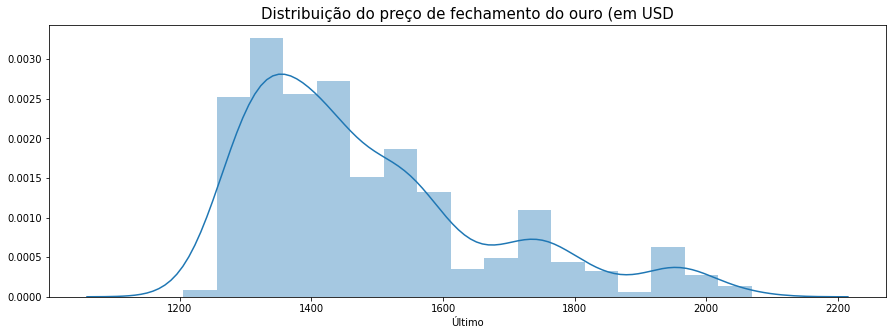

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(ouro['Último'])
plt.title('Distribuição do preço de fechamento do ouro (em USD',size=15);

Observando o gráfico da série tem uma tendência de alta que acelera (período de impacto da pandemia) e ao fim uma queda, justamente o período em que a pandemia parece perder força.

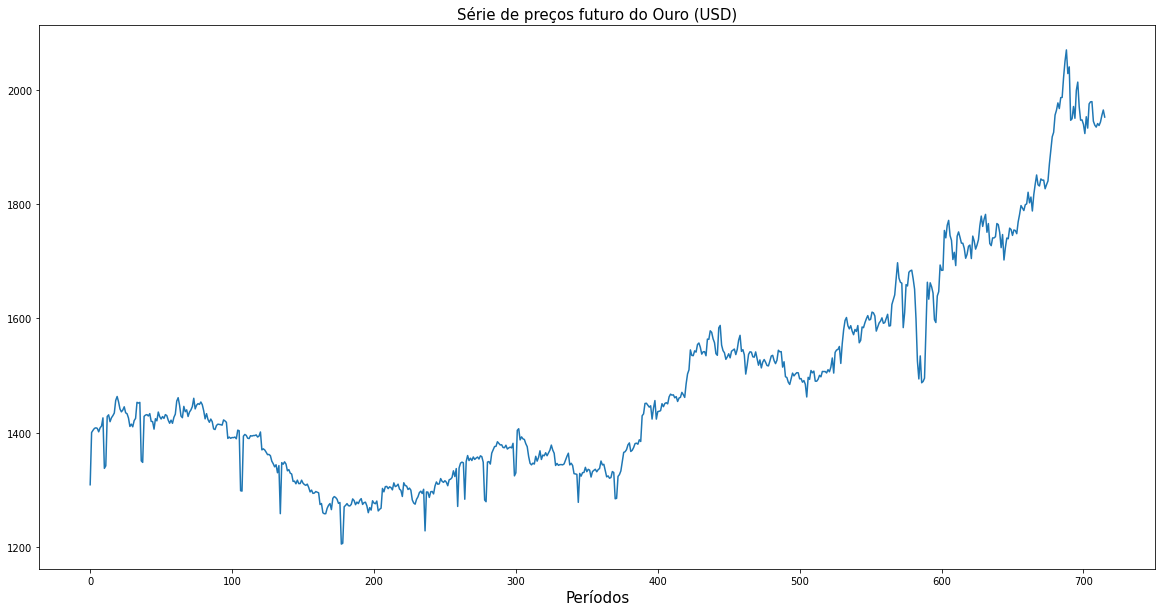

In [32]:
plt.figure(figsize=(20,10))
ouro['Último'].plot()
plt.xlabel('Períodos',size=15)
plt.ylabel('')
plt.title('Série de preços futuro do Ouro (USD)',size=15)
plt.show()

## Sobre a biblioteca *Prophet*

Essa biblioteca foi desenvolvida pelo *Facebook* para facilitar a previsão de séries temporais com base em um modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual, mensal e diária, além de efeito de feriados. Ela funciona bem com séries temporais longas e com forte efeito sazonal. Além disso a biblioteca tem robustez a dados faltantes e a *outliers*.

**A principais vantagens** dessa biblioteca são:

1) Precisão e rapidez;

2) Totalmente automatizado;

3) Previsões ajustáveis;

4) Além da linguagem *Python* essa biblioteca também está disponível em linguagem *R*.

Dentre as **desvantagens** está o fato dessa biblioteca ser quase uma caixa-preta, ou seja, não é possível entender bem como ela funciona.

## Separação dos dados de treino e de teste

Antes de aplicarmos a biblioteca, vamos separar os dados em treino e teste. Aqui iremos separar os últimos 90 dias da nossa série.

Vamos primeiro mudar o nome das colunas para a forma que o *Prophet Facebook* possa ler os dados corretamente.

In [33]:
ouro.columns=['ds','y']

Dados de treino com 626 observações.

In [60]:
treino=ouro[:-150]
treino

,ds,y
0,2018-01-01,1308.70
1,2018-02-01,1400.10
2,2018-03-01,1404.00
3,2018-04-01,1407.30
4,2018-05-01,1408.30
...,...,...
561,2020-02-13,1599.60
562,2020-02-14,1606.90
563,2020-02-16,1586.25
564,2020-02-17,1587.05


Dados de teste com os últimos 120 dias.

In [61]:
teste=ouro[-150:]
teste

,ds,y
566,2020-02-19,1632.2
567,2020-02-20,1640.8
568,2020-02-21,1669.1
569,2020-02-24,1697.1
570,2020-02-25,1670.2
...,...,...
711,2020-07-09,1937.1
712,2020-08-09,1943.2
713,2020-09-09,1954.9
714,2020-10-09,1964.3


## Aplicando a modelagem de séries temporais com o *Prophet*

Instanciando e treinando o modelo *Prophet*.

In [62]:
prophet = Prophet(daily_seasonality=True,seasonality_mode='multiplicative',seasonality_prior_scale=1000,changepoint_range=1).fit(ouro)

Gerando as previsões.

In [63]:
futuro=prophet.make_future_dataframe(periods=365, freq='D')
previsoes=prophet.predict(futuro)

Abaixo podemos ver os a tabela com os componentes que são gerados pelo modelo, como a tendência, os termos aditivos e multiplicativos e os valores das previsões (cada uma com o seu intervalo de confiança definidos como *lower* e *upper*).

In [64]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,223.323394,1286.521505,1477.089595,223.323394,223.323394,5.181959,5.181959,5.181959,5.188196,5.188196,5.188196,0.000997,0.000997,0.000997,0.005240,0.005240,0.005240,0.0,0.0,0.0,1381.968939
1,2018-01-02,223.338013,1288.882394,1491.435017,223.338013,223.338013,5.181959,5.181959,5.181959,5.209469,5.209469,5.209469,0.009560,0.009560,0.009560,0.017949,0.017949,0.017949,0.0,0.0,0.0,1386.810389
2,2018-01-03,223.352633,1295.443518,1483.807673,223.352633,223.352633,5.181959,5.181959,5.181959,5.219145,5.219145,5.219145,0.007634,0.007634,0.007634,0.029553,0.029553,0.029553,0.0,0.0,0.0,1389.062422
3,2018-01-05,223.381872,1295.519306,1493.143881,223.381872,223.381872,5.181959,5.181959,5.181959,5.232877,5.232877,5.232877,0.001725,0.001725,0.001725,0.049193,0.049193,0.049193,0.0,0.0,0.0,1392.311720
4,2018-01-06,223.396492,1265.912085,1468.590328,223.396492,223.396492,5.181959,5.181959,5.181959,5.131779,5.131779,5.131779,-0.107322,-0.107322,-0.107322,0.057142,0.057142,0.057142,0.0,0.0,0.0,1369.817823


Podemos selecionar apenas os mais importantes.

In [65]:
previsoes[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1074,2021-12-02,1806.246469,1553.580463,2078.486215
1075,2021-12-03,1801.792964,1545.111393,2066.786403
1076,2021-12-04,1767.824770,1517.037534,2029.391642
1077,2021-12-05,1823.513467,1576.157606,2102.368841
1078,2021-12-06,1801.533136,1560.932588,2073.872174
1079,2021-12-07,1804.930996,1561.807232,2059.352245
1080,2021-12-08,1805.508780,1550.697166,2076.656627


## Validação do modelo *Prophet*

Vamos ver agora como foi o desempenho do modelo comparando as previsões com os valores reais.

In [66]:
validacao=pd.DataFrame({'ds':teste['ds']})
validacao['ds'].head()

566   2020-02-19
567   2020-02-20
568   2020-02-21
569   2020-02-24
570   2020-02-25
Name: ds, dtype: datetime64[ns]

Gerando a base de validação.

In [67]:
saida=prophet.predict(validacao)

In [68]:
saida[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,1571.007386,1466.630788,1669.962782
1,2020-01-05,1621.129884,1522.932715,1718.623257
2,2020-01-06,1605.763151,1510.611706,1709.017878
3,2020-01-07,1610.937648,1511.502327,1709.965529
4,2020-01-09,1617.006624,1520.560519,1723.299087
...,...,...,...,...
145,2020-11-09,1762.066922,1661.764080,1858.289974
146,2020-12-03,1734.067495,1632.961101,1830.952210
147,2020-12-05,1698.007321,1597.189390,1798.843239
148,2020-12-06,1751.970160,1659.782549,1848.731440


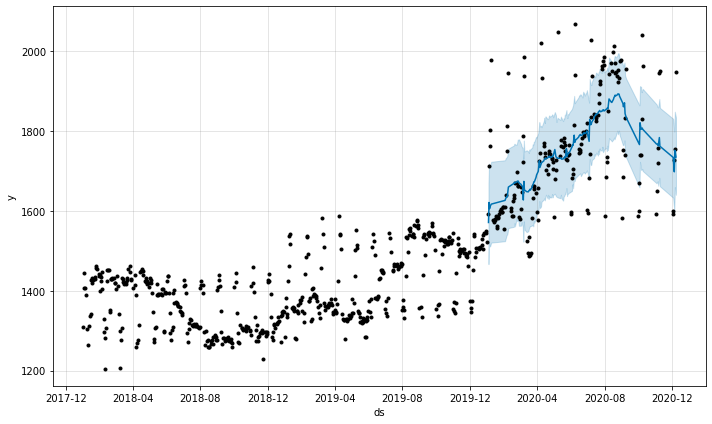

In [69]:
prophet.plot(saida);

Vamos *reindexar* a *saída* para a mesma da base de teste.

In [70]:
saida.index=teste.index

E iremos visualizar os resultados do modelo *prophet*.

Vemos que os resultados não foram bem como queríamos. Os resultados parecem acompanhar os valores reais, mas no final ficam bem abaixo

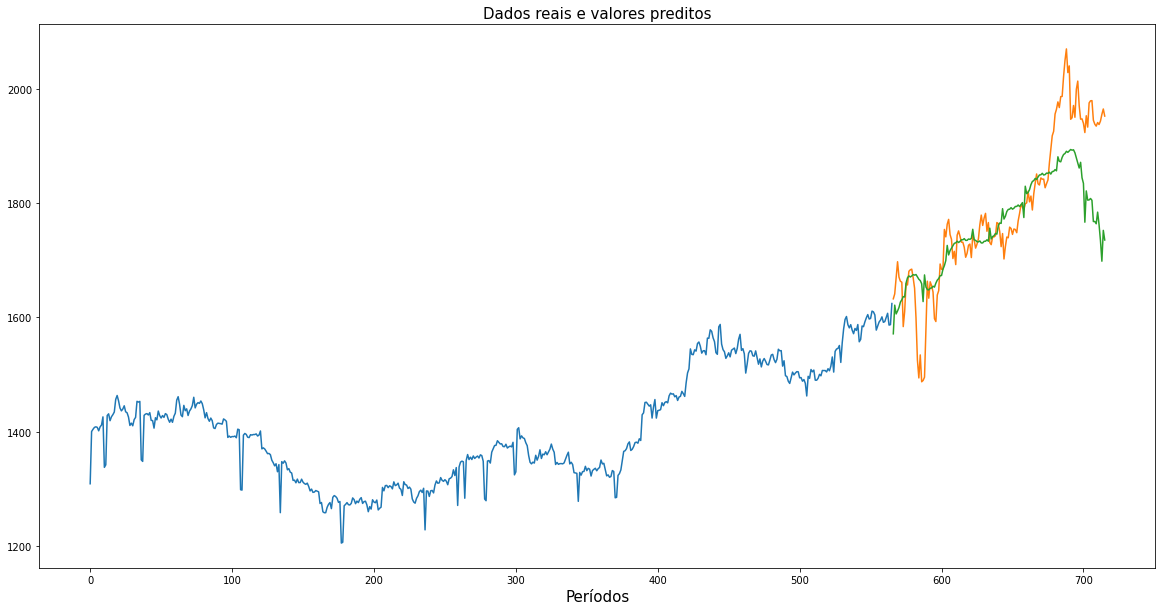

In [71]:
plt.figure(figsize=(20,10))
treino['y'].plot()
teste['y'].plot()
saida['yhat'].plot()
plt.title('Dados reais e valores preditos',size=15)
plt.xlabel("Períodos",size=15);

Vamos agora analisar o valor do RMSE ou Raiz da soma do erro médio quadrado, que é a métrica mais comum para avaliar modelos do tipo regresão e modelos de séries temporais. Vamos comparar o resultado entre os valores de teste e os valores preditos pelo modelo.

---



In [72]:
rmse(saida['yhat'],teste['y'])

82.97005834630932

Comparemos as tabelas estatísticas da base de teste e das previsões. Podemos ver que os valores das estatísticas descritivas são bem próximos. A médias são bem próximas, mas os desvios-padrão são bem diferentes.

In [73]:
print('Tabelas estatísticas da base de teste e da base de validação')
print(" "*254)
display(teste['y'].describe())
print(" "*254)
display(saida['yhat'].describe())

Tabelas estatísticas da base de teste e da base de validação
                                                                                                                                                                                                                                                              


count     150.000000
mean     1783.190667
std       130.772206
min      1487.100000
25%      1702.100000
50%      1754.000000
75%      1911.200000
max      2069.400000
Name: y, dtype: float64

count     150.000000
mean     1758.913020
std        79.532894
min      1571.007386
25%      1698.305868
50%      1749.259813
75%      1831.273015
max      1893.407131
Name: yhat, dtype: float64

Uma outra vantagem do *Prophet Facebook* é que podemos plotar os componentes da série que foi modelada com um simples comando. Abaixo podemos ver os componentes tendência e as sazonalidades (semanal, anual e diária).

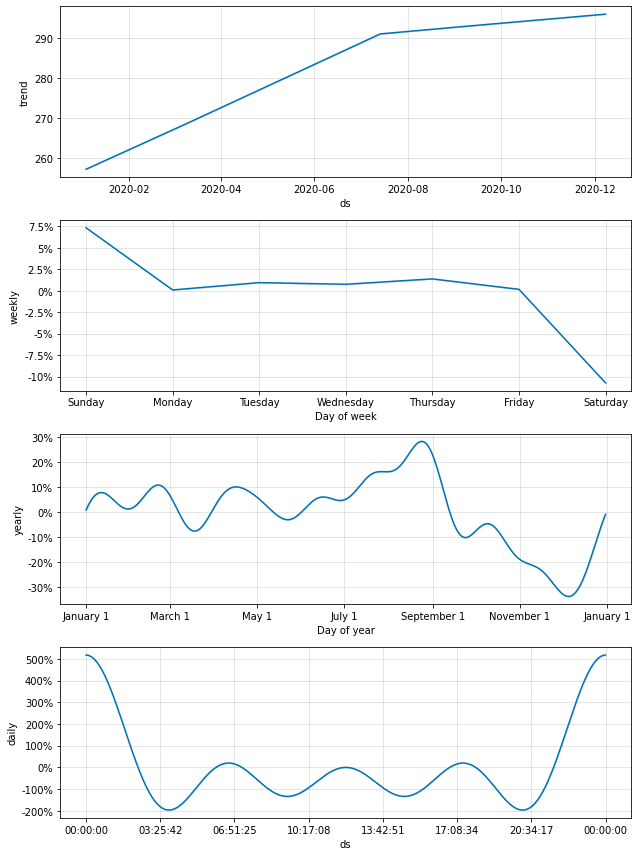

In [74]:
prophet.plot_components(saida);

Agora vamos trabalhar com a base de dados de ouro, mas com a periodicidade mensal. Essa nova série vai de Fevereiro de 2010 até setembro de 2020. Temos 128 observações. A nossa base anterior nós só tínhamos os preços para os anos de 2018 até 2020, mas a periodicidade era diária. Esses dados foram extraídos do *site Yahoo!* e podem ser obtidos [aqui](https://finance.yahoo.com/quote/GC%3DF/history?p=GC%3DF).

Importando a nova base de dados.

In [3]:
from google.colab import files
uploaded= files.upload()

Saving goldm.csv to goldm.csv


Vamos agora observar os valores dessa nossa nova base.

In [5]:
ouro_m=pd.read_csv('goldm.csv')

In [6]:
ouro_m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-01,1081.000000,1127.400024,1045.199951,1118.300049,1118.300049,18209
1,2010-03-01,1119.300049,1145.000000,1085.500000,1113.300049,1113.300049,222583
2,2010-04-01,1125.099976,1181.300049,1111.300049,1180.099976,1180.099976,10917
3,2010-05-01,1178.599976,1246.500000,1159.199951,1212.199951,1212.199951,361661
4,2010-06-01,1224.800049,1264.800049,1196.900024,1245.500000,1245.500000,16703
...,...,...,...,...,...,...,...
123,2020-05-01,1686.599976,1770.500000,1670.500000,1755.099976,1755.099976,32347521
124,2020-06-01,1740.400024,1793.199951,1668.599976,1793.000000,1793.000000,1880902
125,2020-07-01,1793.599976,1981.099976,1765.800049,1962.800049,1962.800049,2225222
126,2020-08-01,1997.400024,2063.000000,1871.599976,1967.599976,1967.599976,3668821


Abaixo vemos a tabela estatística dos preços mensais de ouro.

In [7]:
ouro_m.describe()

,Open,High,Low,Close,Adj Close,Volume
count,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,1371.782814,1423.153124,1327.713282,1378.539847,1378.539847,3.604181e+08
std,203.529092,215.971121,189.280732,208.101427,208.101427,9.290405e+08
min,1061.500000,1098.800049,1045.199951,1060.300049,1060.300049,2.715000e+03
25%,1227.050049,1268.800018,1196.275024,1231.375030,1231.375030,1.104450e+04
50%,1309.700012,1343.799988,1273.200012,1311.299988,1311.299988,2.131740e+05
75%,1524.549988,1570.674957,1459.600037,1523.975006,1523.975006,3.724290e+05
max,1997.400024,2063.000000,1903.099976,1967.599976,1967.599976,4.214050e+09


E aqui visualizamos o comportamento da série ao longo do tempo.

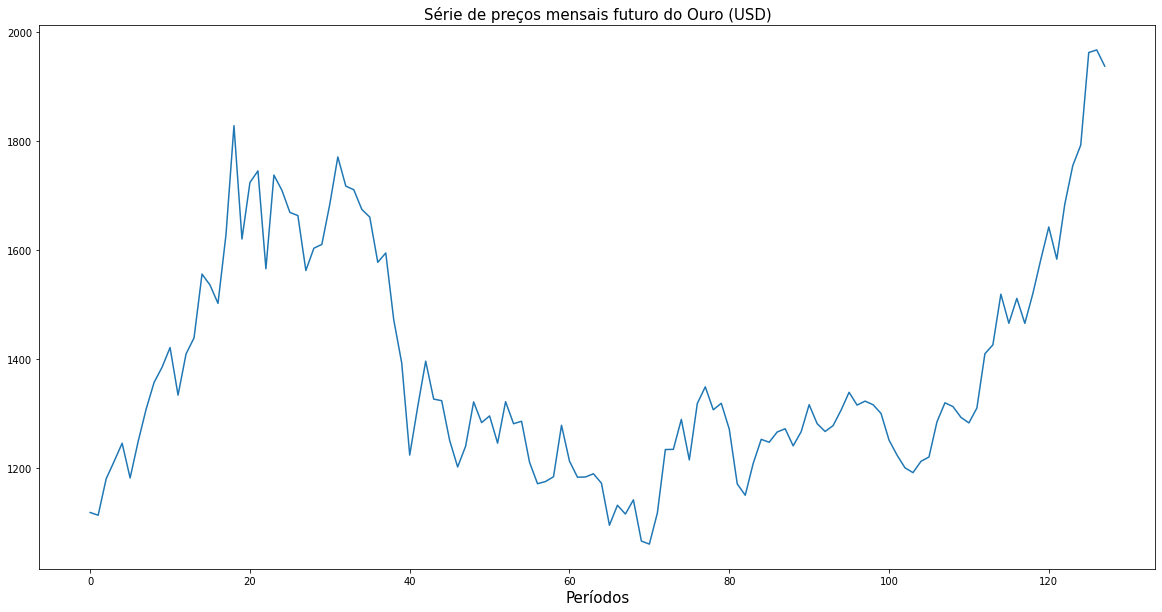

In [8]:
plt.figure(figsize=(20,10))
ouro_m['Close'].plot()
plt.xlabel('Períodos',size=15)
plt.ylabel('')
plt.title('Série de preços mensais futuro do Ouro (USD)',size=15)
plt.show()

## Separação entre os dados de treino e teste

Vamos separar 24 meses para serem os dados de validação do nosso modelo.

Antes iremos selecionar as colunas de data e de preços de fechamento e renomeá-las para os nomes que o *Prophet* possa entender.

In [9]:
ouro_m=ouro_m[['Date','Close']]
ouro_m.columns=['ds','y']

In [10]:
ouro_m

,ds,y
0,2010-02-01,1118.300049
1,2010-03-01,1113.300049
2,2010-04-01,1180.099976
3,2010-05-01,1212.199951
4,2010-06-01,1245.500000
...,...,...
123,2020-05-01,1755.099976
124,2020-06-01,1793.000000
125,2020-07-01,1962.800049
126,2020-08-01,1967.599976


In [12]:
teste_m=ouro_m[-24:]
teste_m.shape

(24, 2)

## Treinando o modelo *Prophet*

Agora iremos treinar o nosso modelo com nossa base de dados e usaremos, assim como no modelo anterior a sazonalidade multiplicativa.

In [77]:
prophet1 = Prophet(daily_seasonality=True,seasonality_mode='multiplicative',seasonality_prior_scale=1000).fit(ouro_m)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Vamos agora gerar as previsões desse novo modelo.

In [78]:
futuro=prophet1.make_future_dataframe(periods=12, freq='MS')
previsoes=prophet1.predict(futuro)

Abaixo podemos visualizar todos os componentes que foram gerados pelo modelo e seus intervalos de confiança a um nível de 5%.

In [79]:
previsoes

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2010-02-01,119.880077,1036.199071,1183.540012,119.880077,119.880077,8.177811,8.177811,8.177811,8.260030,8.260030,8.260030,0.082219,0.082219,0.082219,0.0,0.0,0.0,1110.093118
1,2010-03-01,122.822519,1047.791466,1195.961963,122.822519,122.822519,8.177811,8.177811,8.177811,8.125702,8.125702,8.125702,-0.052109,-0.052109,-0.052109,0.0,0.0,0.0,1120.841740
2,2010-04-01,126.080223,1094.731201,1234.149271,126.080223,126.080223,8.177811,8.177811,8.177811,8.226423,8.226423,8.226423,0.048612,0.048612,0.048612,0.0,0.0,0.0,1163.269410
3,2010-05-01,129.232839,1101.821482,1248.495632,129.232839,129.232839,8.177811,8.177811,8.177811,8.088682,8.088682,8.088682,-0.089129,-0.089129,-0.089129,0.0,0.0,0.0,1174.556168
4,2010-06-01,132.490543,1141.619804,1281.352215,132.490543,132.490543,8.177811,8.177811,8.177811,8.110432,8.110432,8.110432,-0.067379,-0.067379,-0.067379,0.0,0.0,0.0,1207.046099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2021-05-01,221.315134,1897.404458,2112.457799,213.860377,228.852130,8.177811,8.177811,8.177811,8.072911,8.072911,8.072911,-0.104901,-0.104901,-0.104901,0.0,0.0,0.0,2007.972406
136,2021-06-01,224.155816,1928.514909,2162.120451,214.474172,233.606872,8.177811,8.177811,8.177811,8.098013,8.098013,8.098013,-0.079799,-0.079799,-0.079799,0.0,0.0,0.0,2039.372422
137,2021-07-01,226.904864,1977.277778,2231.528052,215.362415,238.575457,8.177811,8.177811,8.177811,8.269840,8.269840,8.269840,0.092029,0.092029,0.092029,0.0,0.0,0.0,2103.371846
138,2021-08-01,229.745546,2051.380542,2340.946731,216.295505,243.455029,8.177811,8.177811,8.177811,8.529091,8.529091,8.529091,0.351280,0.351280,0.351280,0.0,0.0,0.0,2189.266137


Últimas observações dos componentes mais importantes, que são as datas e as previsões (*yhat*) com os seus intervalos de confiança inferiores e superiores.

In [80]:
previsoes[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
133,2021-03-01,1969.907864,1881.309392,2059.368120
134,2021-04-01,2018.651092,1917.567073,2110.125126
135,2021-05-01,2007.972406,1897.404458,2112.457799
136,2021-06-01,2039.372422,1928.514909,2162.120451
137,2021-07-01,2103.371846,1977.277778,2231.528052
138,2021-08-01,2189.266137,2051.380542,2340.946731
139,2021-09-01,2158.452175,2008.019799,2317.126167


Vamos agora comparar nossos resultados com os valores reais.

In [81]:
validacao1=pd.DataFrame({'ds':teste_m['ds']})

In [82]:
saida1=prophet1.predict(validacao1)

Aqui nesse *plot* podemos ver os valores reais representado pelos pontos e os valores preditos representasdo pela reta azul.

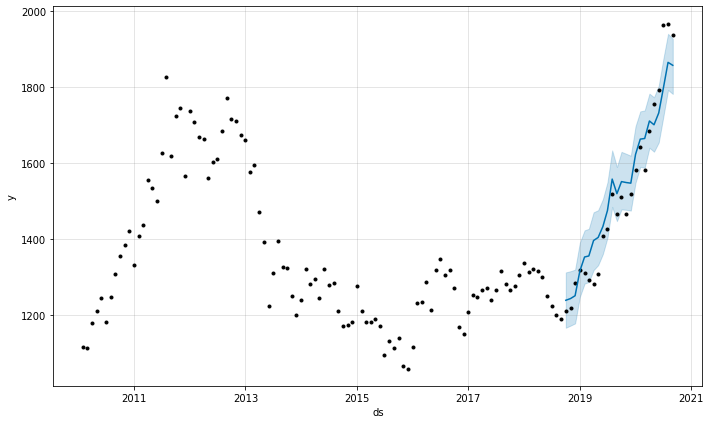

In [83]:
prophet1.plot(saida1);

Vamos *reindexar* nossa base de saída para ter o mesmo índice da nossa base de teste.

In [84]:
saida1.index=teste_m.index

E aqui plotamos os valores de forma que fique melhor visível.

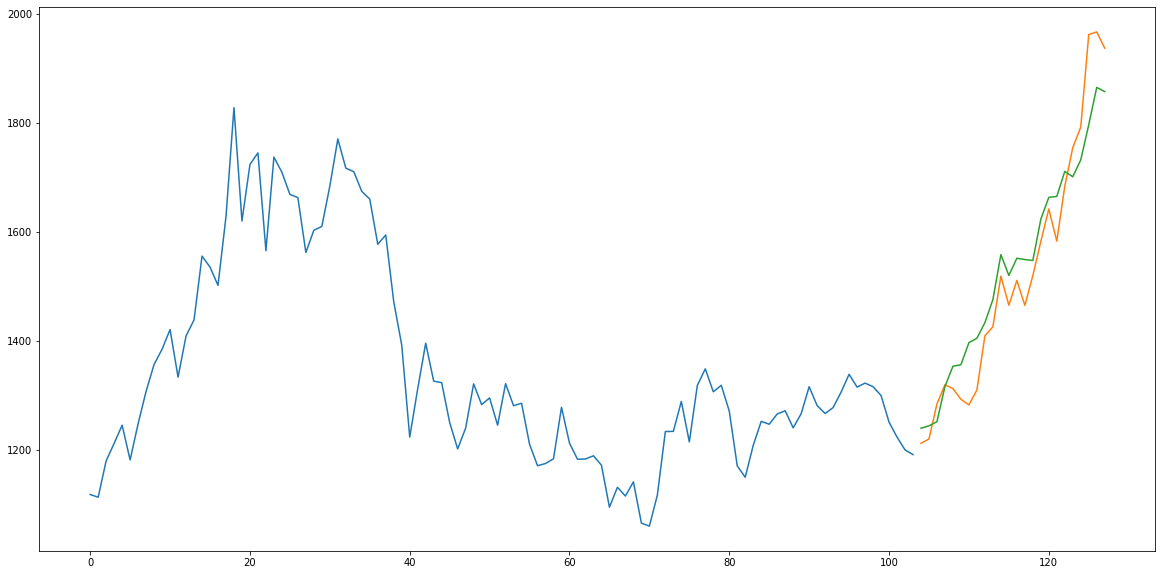

In [85]:
plt.figure(figsize=(20,10))
treino_m['y'].plot()
teste_m['y'].plot()
saida1['yhat'].plot();

Calculando o RMSE desse modelo vemos ficou menor que o do modelo anterior, o que pode indicar que com dados mensais esse modelo foi mais amigável.

In [86]:
rmse(saida1['yhat'],teste_m['y'])

66.97762762910088

Aqui vemos que a média e o desvio-padrão dos dados de teste e das previsçoes estão mais próximos do que essas estatísticas do modelo com dados diários.

In [88]:
print('Tabelas estatísticas da base de teste e da base de validação')
print(" "*254)
display(teste_m['y'].describe())
print(" "*254)
display(saida1['yhat'].describe())

Tabelas estatísticas da base de teste e da base de validação
                                                                                                                                                                                                                                                              


count      24.000000
mean     1519.274994
std       233.355386
min      1212.300049
25%      1312.150024
50%      1488.549988
75%      1652.924988
max      1967.599976
Name: y, dtype: float64

count      24.000000
mean     1534.326199
std       190.763088
min      1239.897345
25%      1386.996478
50%      1548.807446
75%      1674.569248
max      1865.742863
Name: yhat, dtype: float64

Plotando os componentes do novo modelo.

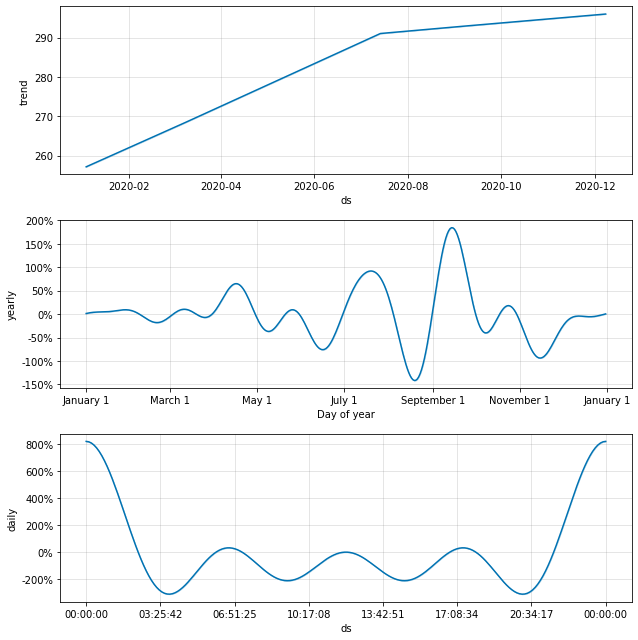

In [75]:
prophet1.plot_components(saida);

## Conclusão

Esse trabalho visou apenas apresentar e utilizar essa biblioteca que é um projeto *open source* do *Facebook*. Percebemos que o uso dessa ferramenta é simples e exige pouco conhecimento de séries temporais de quem está manipulando-a (simplesmente definir duas colunas com as datas e valores, separar dados de treino e teste, avaliar os resultados com alguma métrica e plotar os componentes). 

Não obtivemos um resultado tão bom quanto gostaríamos que tívessemos, então iremos trabalhar mais vezes e fazer outros projetos com o *Prophet* com outras séries temporais e diferentes periodicidades.
